In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### preproccesing

In [2]:
Data=pd.read_csv("mobile_price.csv")

In [3]:
Data.shape

(3000, 22)

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
id               3000 non-null int64
battery_power    3000 non-null int64
blue             3000 non-null int64
clock_speed      3000 non-null float64
dual_sim         3000 non-null int64
fc               3000 non-null int64
four_g           3000 non-null int64
int_memory       3000 non-null int64
m_dep            3000 non-null float64
mobile_wt        3000 non-null int64
n_cores          3000 non-null int64
pc               3000 non-null int64
px_height        3000 non-null int64
px_width         3000 non-null int64
ram              3000 non-null int64
sc_h             3000 non-null int64
sc_w             3000 non-null int64
talk_time        3000 non-null int64
three_g          3000 non-null int64
touch_screen     3000 non-null int64
wifi             3000 non-null int64
price_range      2000 non-null float64
dtypes: float64(3), int64(19)
memory usage: 515.7 KB


In [5]:
Data.isna().sum()

id                  0
battery_power       0
blue                0
clock_speed         0
dual_sim            0
fc                  0
four_g              0
int_memory          0
m_dep               0
mobile_wt           0
n_cores             0
pc                  0
px_height           0
px_width            0
ram                 0
sc_h                0
sc_w                0
talk_time           0
three_g             0
touch_screen        0
wifi                0
price_range      1000
dtype: int64

In [6]:
Data=Data.drop("id",axis=1)

In [7]:
Data=Data.dropna(axis=0)

In [8]:
Data.shape

(2000, 21)

In [9]:
Data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### VISUALIZATION


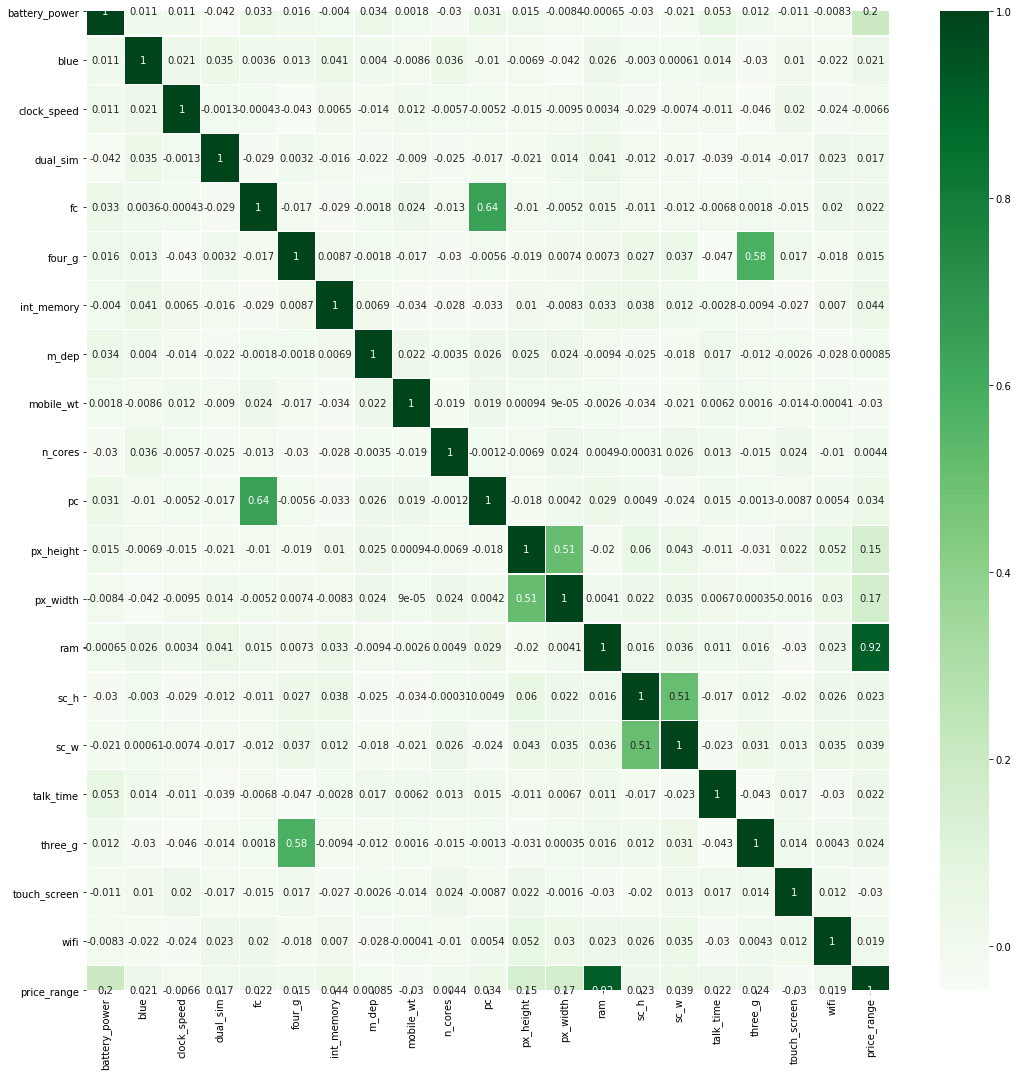

In [10]:
corrmat =Data.corr() 
f, ax = plt.subplots(figsize =(18,18)) 
sns.heatmap(corrmat, ax = ax, annot=True, cmap ="Greens", linewidths = 0.2)

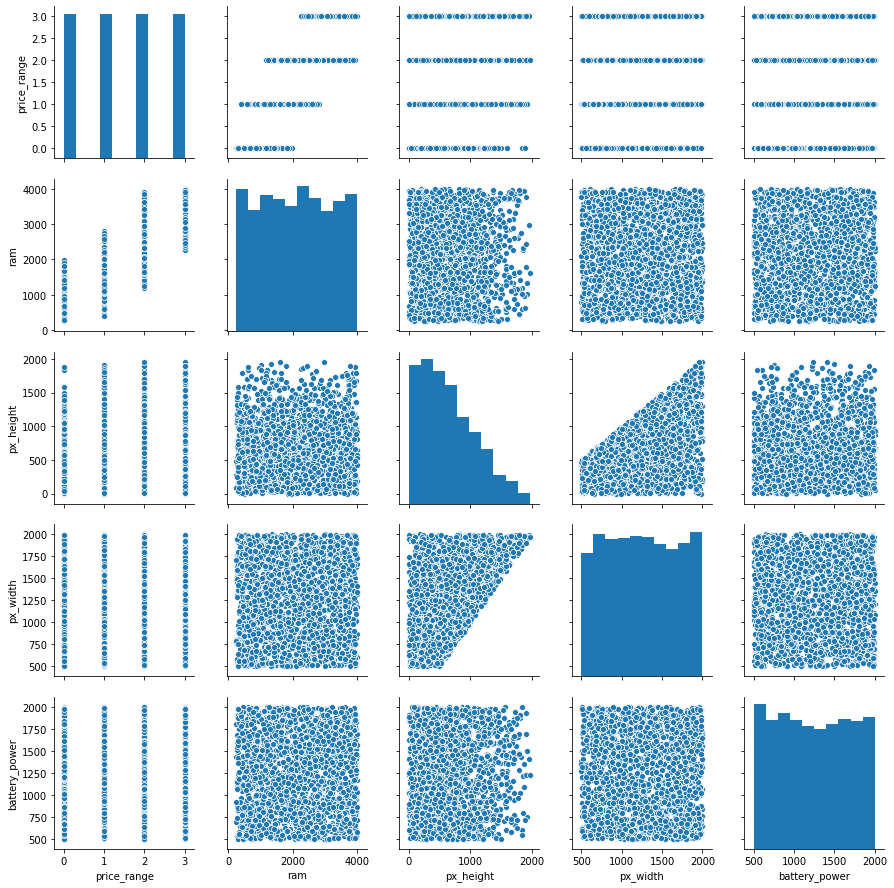

In [11]:
sns.pairplot(Data[['price_range', 'ram', 'px_height','px_width','battery_power']])

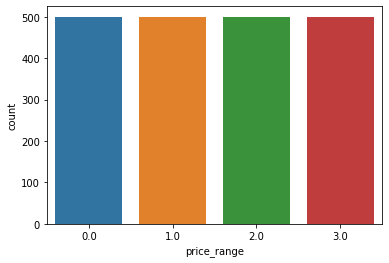

In [12]:
sns.countplot(Data['price_range'])
plt.show()

##### price range vs ram

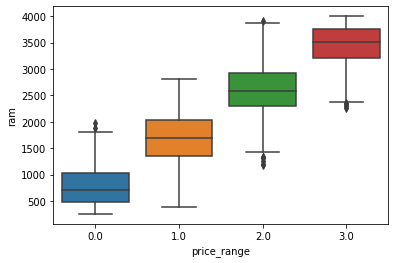

In [13]:
sns.boxplot(Data['price_range'],Data['ram'])

#### wifi vs price range

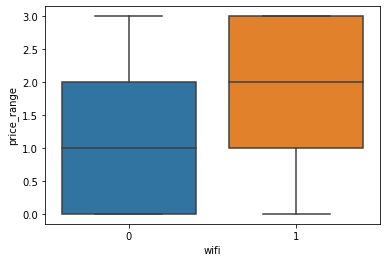

In [14]:
sns.boxplot(Data['wifi'],Data['price_range'])
plt.show()

#### 3G suporting Phone with 3G

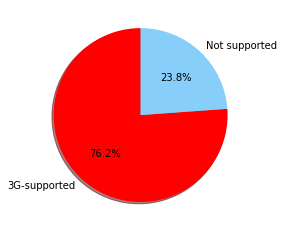

In [15]:
labels = ["3G-supported",'Not supported']
values = Data['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['red', 'lightskyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

#### phone with 4G

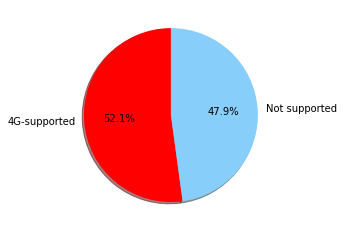

In [16]:
labels = ["4G-supported",'Not supported']
values = Data['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['red', 'lightskyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

In [17]:
Data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

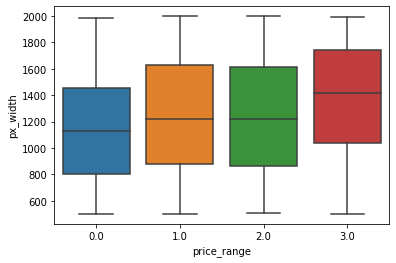

In [18]:
sns.boxplot('price_range','px_width',data=Data)

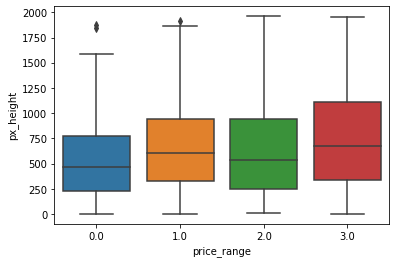

In [19]:
sns.boxplot('price_range','px_height',data=Data)

# splitting the data

In [20]:
X=Data[['battery_power','int_memory','pc','px_height','px_width','ram','clock_speed', 'dual_sim', 'fc', 'four_g','fc','three_g',
       'touch_screen']]

In [21]:
y=Data['price_range']

In [22]:
X.shape

(2000, 13)

In [23]:
y.shape

(2000,)

In [24]:
#TRAIN TEST

In [25]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.5)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
from sklearn.metrics import classification_report

# logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(X_train,y_train)
y_pred=model.predict(X_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [29]:
accuracy_score(y_test,y_pred)

0.757

In [30]:
y_true=y_test

In [31]:
y_pred=y_pred

In [32]:
target_names=['0','1','2','3']

In [33]:
print(classification_report(y_true,y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       257
           1       0.76      0.62      0.68       248
           2       0.61      0.46      0.52       252
           3       0.72      0.98      0.83       243

    accuracy                           0.76      1000
   macro avg       0.75      0.76      0.74      1000
weighted avg       0.75      0.76      0.74      1000



# decision tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dtree=DecisionTreeClassifier()
model=dtree.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred)

0.81

In [36]:
y_pred=y_pred

In [37]:
y_true=y_test

In [38]:
target_names=['0','1','2','3']

In [39]:
print(classification_report(y_true,y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       257
           1       0.79      0.75      0.77       248
           2       0.73      0.72      0.73       252
           3       0.83      0.86      0.84       243

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000



# random forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)
model=rfc.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [41]:
y_true=y_test

In [42]:
y_pred=y_pred

In [43]:
target_names=['0','1','2','3']

In [44]:
print(classification_report(y_true,y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       257
           1       0.85      0.89      0.87       248
           2       0.87      0.77      0.82       252
           3       0.88      0.93      0.91       243

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.88      1000
weighted avg       0.89      0.89      0.88      1000



In [45]:
accuracy_score(y_test,y_pred)

0.886

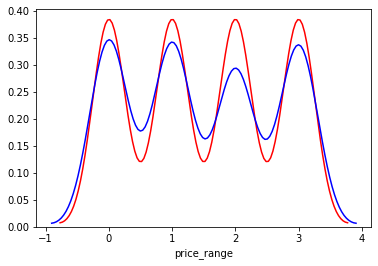

In [46]:
ax1=sns.distplot(y,hist=False,color='r')
sns.distplot(y_pred,hist=False,color='b',ax=ax1)

# linear regression

In [47]:
from sklearn.linear_model import LinearRegression
reg_model=LinearRegression()
reg_model.fit(X_train,y_train)
y_pred=reg_model.predict(X_train)

In [48]:
from sklearn.metrics import r2_score,mean_squared_error
print("RMSE is :", mean_squared_error(y_test,y_pred))

RMSE is : 2.307428576153101


In [49]:
print("R2_score :",r2_score(y_test,y_pred))

R2_score : -0.8464761232268685


In [50]:
# KNN MODEL

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_train)

In [52]:
print("accuracy :",accuracy_score(y_test,y_pred))


accuracy : 0.261


In [53]:
y_pred=y_pred

In [54]:
y_true=y_test

In [55]:
target_names=['0','1','2','3']

In [56]:
print(classification_report(y_true,y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.24      0.24      0.24       257
           1       0.26      0.25      0.26       248
           2       0.27      0.27      0.27       252
           3       0.27      0.28      0.27       243

    accuracy                           0.26      1000
   macro avg       0.26      0.26      0.26      1000
weighted avg       0.26      0.26      0.26      1000



## KNN model

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
model=knn.fit(X_train,y_train)
y_pred=model.predict(X_test)

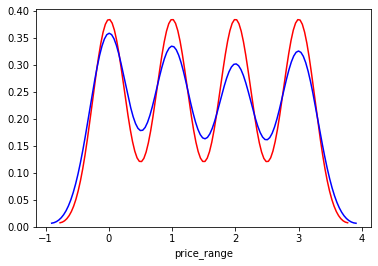

In [58]:
ax1=sns.distplot(y,hist=False,color='r')
sns.distplot(y_pred,hist=False,color='b',ax=ax1)

In [59]:
accuracy_score(y_test,y_pred)

0.923

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96       257
         1.0       0.89      0.90      0.89       248
         2.0       0.93      0.85      0.89       252
         3.0       0.94      0.96      0.95       243

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



## conclusion

### we got higher Accuracy and f1 values in KNN model

##### accuracy= 92 and F1 score=92

##### we take KNN model  to make the model